In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

plt.style.use('bmh')

import pandas as pd
from pandas import read_csv, set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 
from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA





/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_16215/369869525.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


In [3]:
dataset = read_csv('Dow_adjcloses.csv', index_col=0)

In [6]:
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [7]:
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,363.000000,...,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,2741.000000,4804.000000,4804.000000
mean,86.768590,49.659383,49.106634,85.481517,56.697445,61.735451,21.652896,24.983814,46.367724,64.897404,...,23.724266,20.736962,49.959573,55.961115,62.208919,64.417705,27.193436,53.323035,50.766604,41.696637
std,53.941623,22.564051,55.020296,79.084514,34.663396,31.713863,10.074094,10.611235,32.733220,5.768347,...,20.987536,7.629779,19.769481,34.644166,32.626864,62.920008,11.973258,37.647367,17.039732,19.937069
min,25.140195,8.713025,0.827607,17.463252,9.247340,17.565805,6.842430,11.698790,11.018313,49.090000,...,2.594833,8.041066,16.203766,13.286538,14.520547,5.175169,11.209926,9.846111,30.747677,17.317194
25%,51.191601,34.078903,3.899987,37.406768,26.335348,31.820217,14.910132,15.419998,22.044106,62.249826,...,8.036966,15.030615,35.413562,29.906759,34.328042,23.498173,17.433612,18.958517,38.062387,27.704467
50%,63.513883,42.274116,23.316182,58.436552,53.047521,56.941779,18.577993,20.563342,29.521283,66.586254,...,14.146826,18.643331,46.734628,39.823712,55.714581,42.923977,21.556066,45.207207,42.782495,32.705776
75%,122.906370,66.815558,84.007174,112.996317,76.487605,91.687905,24.649935,34.927140,75.833054,69.143042,...,36.544526,25.402775,68.134961,80.767355,92.557058,73.170959,38.995728,76.966054,65.076409,58.164790
max,251.980826,112.420728,231.260273,411.110000,166.832487,128.679825,63.698248,50.400000,117.972904,75.261152,...,85.300186,45.841240,98.030000,146.564192,141.279565,286.330000,60.016174,150.524693,107.009557,90.187639


<Axes: title={'center': 'Corr Matrix'}>

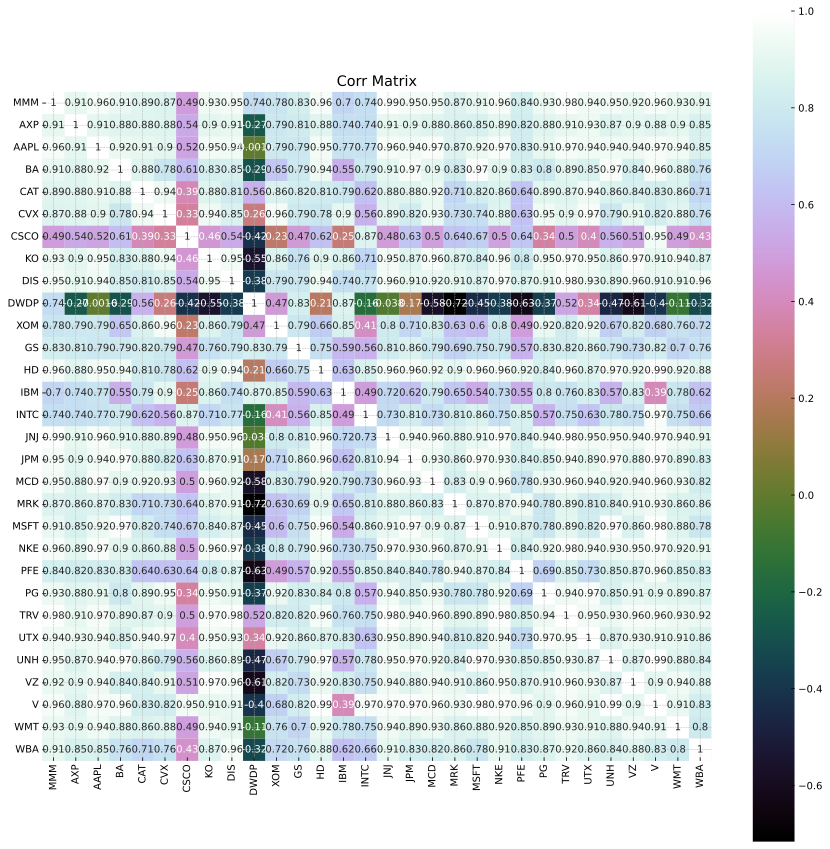

In [8]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Corr Matrix')
sns.heatmap(correlation, vmax=1, square = True, annot=True, cmap='cubehelix')

In [9]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

In [11]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

In [15]:
# dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

In [16]:
dataset = dataset.fillna(method='ffill')

In [17]:
dataset=dataset.dropna(axis=0)

In [18]:
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,23.862240,...,38.135101,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,23.405167,...,36.846046,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,24.569179,...,37.235380,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,25.958680,...,35.988857,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,25.882501,...,36.459983,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,48.535033,21.051805


In [19]:
datareturns = dataset.pct_change()

In [23]:
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns), columns = datareturns.columns, index = datareturns.index)

datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-2.783595,-1.714709,-3.315410,-0.118661,-0.672219,-0.030180,-2.304966,0.236988,3.089349,-1.283230,...,-1.775398,-2.928290,-2.410724,-1.504940,-0.763689,-2.479826,-0.699007,-2.097503,-2.506698,-2.168121
2000-01-05,3.491817,-0.250501,0.522505,3.667454,1.828869,1.321991,0.305480,0.823827,1.857267,3.247913,...,0.527845,3.023981,1.148398,-0.671538,0.510836,-0.588886,-0.164457,2.128254,-1.568981,0.502429


<Axes: xlabel='Date'>

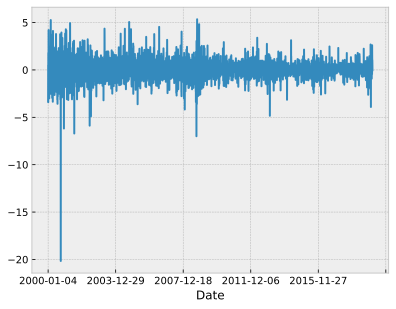

In [24]:
rescaledDataset.AAPL.plot()

In [25]:
percentage = int(len(rescaledDataset)*0.8)

In [27]:
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

In [28]:
X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]

stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [29]:
pca = PCA()
PrincipalComp = pca.fit(X_train)

In [32]:
pca.components_[0]

array([0.21582936, 0.23386753, 0.14891819, 0.19067665, 0.2070607 ,
       0.19567963, 0.18377114, 0.16578797, 0.21028068, 0.20451242,
       0.21001152, 0.20356152, 0.18739017, 0.18792053, 0.1722417 ,
       0.22116815, 0.15670534, 0.16357769, 0.19154166, 0.17031089,
       0.18247522, 0.1564646 , 0.2053774 , 0.22275759, 0.15892382,
       0.17744542, 0.17085513, 0.15699547])

In [37]:
series1 = pd.Series(pca.explained_variance_ratio_[:10]).sort_values()*100
series2 = pd.Series(pca.explained_variance_ratio_[:10]).cumsum()*100

<Axes: >

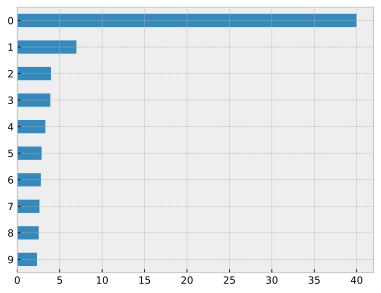

In [39]:
series1.plot.barh()

<Axes: >

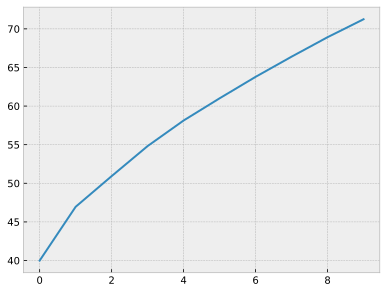

In [40]:
series2.plot()

In [42]:
def PCweights():
    weights = pd.DataFrame()
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)] = pca.components_[i] / sum(pca.components_[i])
        
    weights = weights.values.T
    return weights

weights = PCweights()

array([0.04109385, 0.04452832, 0.02835398, 0.03630478, 0.0394243 ,
       0.03725735, 0.03498998, 0.03156599, 0.04003739, 0.03893911,
       0.03998614, 0.03875806, 0.03567904, 0.03578002, 0.03279477,
       0.04211036, 0.02983666, 0.03114515, 0.03646948, 0.03242715,
       0.03474323, 0.02979082, 0.0391038 , 0.04241299, 0.03025905,
       0.03378556, 0.03253077, 0.0298919 ])

In [48]:
pca.components_[0]/sum(pca.components_[0])

array([0.04109385, 0.04452832, 0.02835398, 0.03630478, 0.0394243 ,
       0.03725735, 0.03498998, 0.03156599, 0.04003739, 0.03893911,
       0.03998614, 0.03875806, 0.03567904, 0.03578002, 0.03279477,
       0.04211036, 0.02983666, 0.03114515, 0.03646948, 0.03242715,
       0.03474323, 0.02979082, 0.0391038 , 0.04241299, 0.03025905,
       0.03378556, 0.03253077, 0.0298919 ])

In [51]:
toppfs = pd.DataFrame(pca.components_[:10])

In [52]:
toppfs

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.215829,0.233868,0.148918,0.190677,0.207061,0.195680,0.183771,0.165788,0.210281,0.204512,...,0.191542,0.170311,0.182475,0.156465,0.205377,0.222758,0.158924,0.177445,0.170855,0.156995
1,-0.070815,0.093126,0.298917,-0.025957,0.026421,-0.148512,0.363068,-0.233288,0.082483,-0.174849,...,0.234745,0.028482,-0.256390,-0.273625,-0.028518,-0.009224,-0.175682,-0.031075,-0.056567,-0.140595
2,-0.097436,-0.250230,0.289157,-0.140797,-0.149301,-0.005133,0.264032,0.176101,-0.065609,0.061541,...,0.260061,-0.142709,0.198317,0.129883,-0.196898,-0.134489,-0.091927,0.147703,-0.045093,-0.036056
3,0.022016,0.061793,-0.012227,0.023767,0.118917,0.440067,-0.040530,-0.171698,0.020294,0.389794,...,0.049359,-0.191347,0.080984,-0.253522,0.095580,0.025842,0.129628,-0.007292,-0.440620,-0.262060
4,-0.158918,0.216512,-0.088562,-0.250630,-0.214864,-0.261559,-0.005879,-0.147611,-0.003449,-0.276575,...,-0.035791,-0.138186,0.309942,-0.038368,0.176619,-0.252324,0.063896,0.181664,0.011671,-0.081979
5,-0.058822,0.021729,-0.288252,-0.132105,-0.044262,0.186296,-0.035665,0.055488,0.130198,0.246615,...,0.009511,0.192736,-0.042743,-0.086072,-0.074247,-0.140401,-0.594257,0.508597,0.136547,-0.207373
6,-0.065915,0.094179,0.058015,-0.216691,-0.105464,-0.017257,0.014202,0.488454,-0.017351,-0.029583,...,0.006839,-0.037131,-0.272213,0.283556,0.250589,-0.133342,0.282227,0.221259,-0.195239,-0.273655
7,-0.204824,-0.081871,0.244029,-0.363075,-0.100587,0.268328,-0.084448,-0.026153,-0.127697,0.248583,...,0.046335,0.165944,-0.036578,-0.328051,0.062081,-0.331501,0.354707,-0.054077,0.296211,0.170877
8,0.094548,0.036616,-0.101866,-0.102810,0.075915,0.001941,-0.051670,0.276944,-0.117322,0.026790,...,0.096813,0.011406,-0.132851,0.213896,-0.099331,-0.025572,0.012976,0.061198,0.128532,0.197992
9,0.030036,-0.008706,-0.098113,-0.176976,0.040755,0.170838,0.059848,-0.113694,-0.281303,0.164947,...,0.068362,-0.647921,-0.011485,0.262881,0.173893,-0.025474,-0.280205,-0.191604,0.186920,0.180532


In [53]:
eigenpfs = toppfs.div(toppfs.sum(1),axis=0)

In [56]:
eigenpfs

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.041094,0.044528,0.028354,0.036305,0.039424,0.037257,0.034990,0.031566,0.040037,0.038939,...,0.036469,0.032427,0.034743,0.029791,0.039104,0.042413,0.030259,0.033786,0.032531,0.029892
1,0.353454,-0.464808,-1.491957,0.129558,-0.131870,0.741253,-1.812144,1.164387,-0.411690,0.872709,...,-1.171660,-0.142159,1.279692,1.365716,0.142341,0.046041,0.876867,0.155099,0.282336,0.701737
2,-0.266378,-0.684095,0.790518,-0.384921,-0.408170,-0.014032,0.721828,0.481437,-0.179367,0.168244,...,0.710973,-0.390149,0.542174,0.355082,-0.538293,-0.367676,-0.251316,0.403801,-0.123279,-0.098573
3,-0.078052,-0.219071,0.043348,-0.084260,-0.421592,-1.560152,0.143690,0.608713,-0.071946,-1.381919,...,-0.174989,0.678374,-0.287110,0.898801,-0.338854,-0.091617,-0.459565,0.025854,1.562112,0.929070
4,4.399224,-5.993550,2.451594,6.938021,5.947920,7.240570,0.162735,4.086212,0.095474,7.656239,...,0.990774,3.825317,-8.579909,1.062103,-4.889221,6.984904,-1.768781,-5.028887,-0.323071,2.269370
5,0.393083,-0.145207,1.926257,0.882796,0.295779,-1.244932,0.238330,-0.370801,-0.870055,-1.648017,...,-0.063556,-1.287967,0.285633,0.575180,0.496156,0.938236,3.971145,-3.398720,-0.912478,1.385779
6,-0.710101,1.014584,0.624995,-2.334394,-1.136158,-0.185911,0.152998,5.262075,-0.186919,-0.318692,...,0.073673,-0.400014,-2.932529,3.054723,2.699575,-1.436481,3.040407,2.383602,-2.103292,-2.948064
7,-1.021626,-0.408359,1.217176,-1.810958,-0.501714,1.338377,-0.421212,-0.130445,-0.636934,1.239893,...,0.231109,0.827699,-0.182446,-1.636263,0.309650,-1.653470,1.769218,-0.269725,1.477450,0.852307
8,-0.984192,-0.381155,1.060364,1.070191,-0.790227,-0.020206,0.537852,-2.882834,1.221260,-0.278869,...,-1.007765,-0.118735,1.382909,-2.226533,1.033976,0.266192,-0.135069,-0.637034,-1.337941,-2.060980
9,-0.334392,0.096928,1.092285,1.970258,-0.453719,-1.901920,-0.666286,1.265748,3.131712,-1.836335,...,-0.761071,7.213239,0.127858,-2.926627,-1.935928,0.283604,3.119495,2.133109,-2.080963,-2.009847


In [68]:
def sharpe_ratio(returns, periods=252):
    
    n_years = returns.shape[0]/periods
    ann_return = np.power(np.prod(1+returns),(1/n_years))-1
    ann_vol = returns.std() * np.sqrt(periods)
    ann_sharpe = ann_return/ann_vol
    
    return ann_return, ann_vol, ann_sharpe

In [81]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_[:10])
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    annualized_vol = np.array([0.] * n_portfolios)
    
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        pc_w = pcs[i] / sum(pcs[i])
        
        eigen_pfi = pd.DataFrame(data = {'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_pfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_pfi_returns = np.dot(X_train_raw.loc[:, eigen_pfi.index], pc_w)
        eigen_pfi_returns = pd.Series(eigen_pfi_returns.squeeze(), index = X_train_raw.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_pfi_returns)
        annualized_ret[i]  = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    highest_sharpe = np.argmax(sharpe_metric)
    
    
    print(highest_sharpe)
    
optimizedPortfolio()
        

0


/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_16215/1636584353.py:4: RuntimeWarning: invalid value encountered in power
  ann_return = np.power(np.prod(1+returns),(1/n_years))-1
/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_16215/1636584353.py:4: RuntimeWarning: invalid value encountered in power
  ann_return = np.power(np.prod(1+returns),(1/n_years))-1
/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_16215/1636584353.py:4: RuntimeWarning: invalid value encountered in power
  ann_return = np.power(np.prod(1+returns),(1/n_years))-1


In [82]:
# this pf is the best performing

eigenpfs.iloc[:,0]

0    0.041094
1    0.353454
2   -0.266378
3   -0.078052
4    4.399224
5    0.393083
6   -0.710101
7   -1.021626
8   -0.984192
9   -0.334392
Name: 0, dtype: float64